## Notebook for the Data Analytics Hackathon

* The notebook that you submit **must** run (without *any* errors), and create a `submission.csv` file, in the required format.

* This notebook should serve as a template to your final notebook submission.

In [218]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

`index_col` helps you to retain the index as provided in the dataset.

In [219]:
# To import libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from pandas.core.frame import dataclasses_to_dicts
from datetime import datetime

In [220]:
# Load train and test data
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [221]:
# Check for missing values
print(train_data.isnull().sum())
print(test_data.isnull().sum())

id          0
Date        0
Open        0
Close       0
Volume      0
Strategy    0
dtype: int64
id        0
Date      0
Open      0
Volume    0
dtype: int64


In [222]:
train_data.head()

,id,Date,Open,Close,Volume,Strategy
0,0,2015-06-01,66.208486,75.609978,298506300,Hold
1,1,2015-06-08,64.116235,74.443331,227974800,Hold
2,2,2015-06-15,47.701942,71.140831,250670900,Buy
3,3,2015-06-22,54.754816,72.881344,223614300,Hold
4,4,2015-06-29,48.031899,66.284718,406814900,Buy


In [223]:
test_data.head()

,id,Date,Open,Volume
0,0,2021-03-01,72.708331,205897600
1,1,2021-03-08,73.310886,214095600
2,2,2021-03-15,70.610119,151601700
3,3,2021-03-22,70.256017,193982500
4,4,2021-03-29,68.258324,220238400


In [224]:
train_data.info()
train_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        300 non-null    int64  
 1   Date      300 non-null    object 
 2   Open      300 non-null    float64
 3   Close     300 non-null    float64
 4   Volume    300 non-null    int64  
 5   Strategy  300 non-null    object 
dtypes: float64(2), int64(2), object(2)
memory usage: 14.2+ KB


,id,Open,Close,Volume
count,300.000000,300.000000,300.000000,3.000000e+02
mean,149.500000,75.977813,79.430489,1.866300e+08
std,86.746758,16.158343,13.878395,7.952792e+07
min,0.000000,40.269435,47.979353,5.991330e+07
25%,74.750000,64.872395,69.689227,1.324862e+08
50%,149.500000,79.805683,82.991900,1.715536e+08
75%,224.250000,88.342927,89.719145,2.201842e+08
max,299.000000,102.558322,103.119373,6.935702e+08


In [225]:
# Clean the data
train_data.drop_duplicates(inplace=True)

In [226]:
# Convert train_data "Date" field to datetime
train_data['Date'] = train_data['Date'].apply(lambda x: datetime.strptime(x, "%Y-%m-%d"))


In [227]:
train_data

,id,Date,Open,Close,Volume,Strategy
0,0,2015-06-01,66.208486,75.609978,298506300,Hold
1,1,2015-06-08,64.116235,74.443331,227974800,Hold
2,2,2015-06-15,47.701942,71.140831,250670900,Buy
3,3,2015-06-22,54.754816,72.881344,223614300,Hold
4,4,2015-06-29,48.031899,66.284718,406814900,Buy
...,...,...,...,...,...,...
295,295,2021-01-25,81.284821,83.373498,117281600,Sell
296,296,2021-02-01,71.970249,85.294903,177655800,Sell
297,297,2021-02-08,71.784627,83.266453,146003500,Hold
298,298,2021-02-15,69.372333,81.026827,167762500,Hold


In [228]:
submission = pd.DataFrame()
submission["Date"] = test_data["Date"]

## **Data Visualisation**

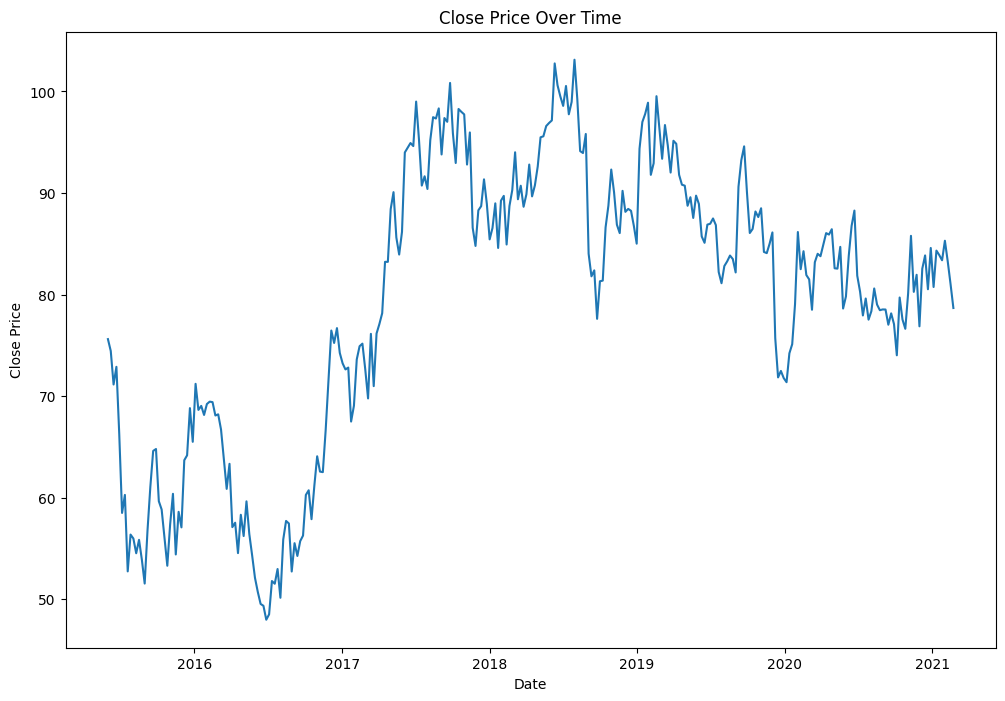

In [229]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Close price plotting and trend
plt.figure(figsize=(12, 8))
plt.plot(train_data['Date'], train_data['Close'])
plt.ylabel('Close Price')
plt.xlabel('Date')
plt.title('Close Price Over Time')
plt.show()


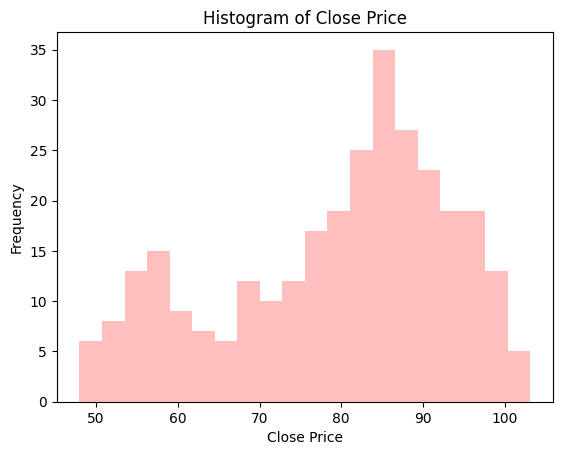

In [230]:
# Plot a histogram of 'Close Price'
plt.hist(train_data['Close'], bins=20, color='red', alpha=0.25)
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.title('Histogram of Close Price')
plt.show()


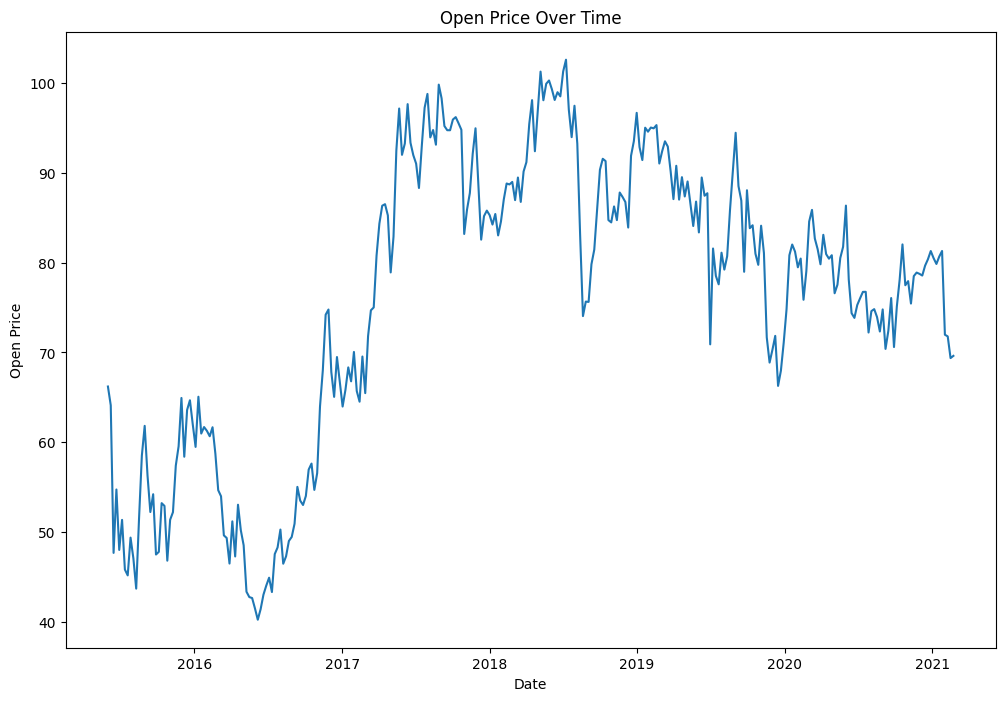

In [231]:
# Open price plot and trend over time
plt.figure(figsize=(12, 8))
plt.plot(train_data['Date'], train_data['Open'])
plt.ylabel('Open Price')
plt.xlabel('Date')
plt.title('Open Price Over Time')
plt.show()

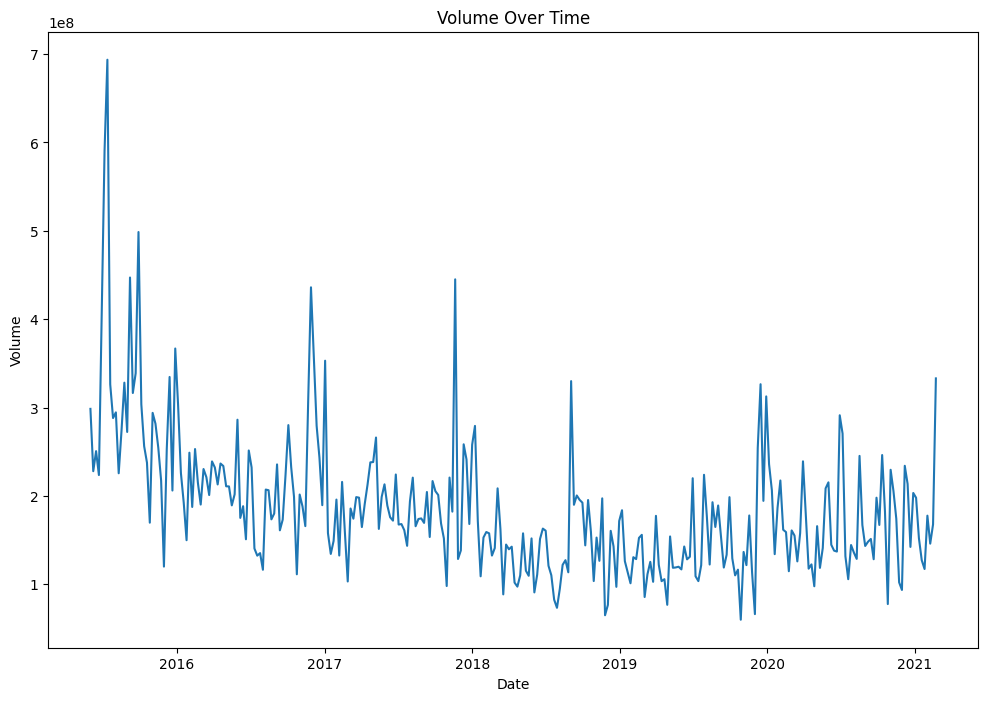

In [232]:
# Volume plot and trend over time
plt.figure(figsize=(12, 8))
plt.plot(train_data['Date'], train_data['Volume'])
plt.ylabel('Volume')
plt.xlabel('Date')
plt.title('Volume Over Time')
plt.show()

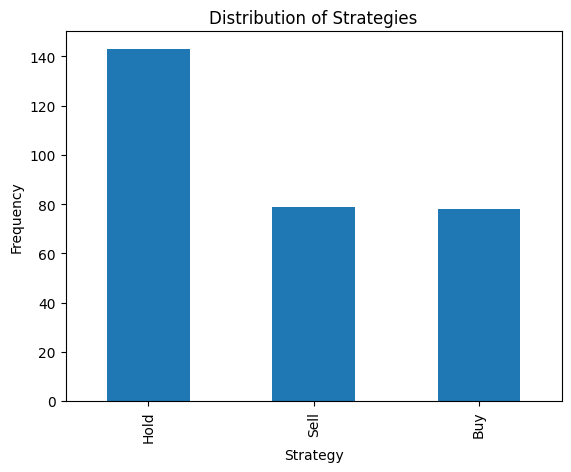

In [233]:
# Distribution of the strategy used 
strategy_counts = train_data['Strategy'].value_counts()
strategy_counts.plot(kind='bar')

plt.xlabel('Strategy')
plt.ylabel('Frequency')
plt.title('Distribution of Strategies')
plt.show()

# Mostly the strategy is to hold rather than sell or buy

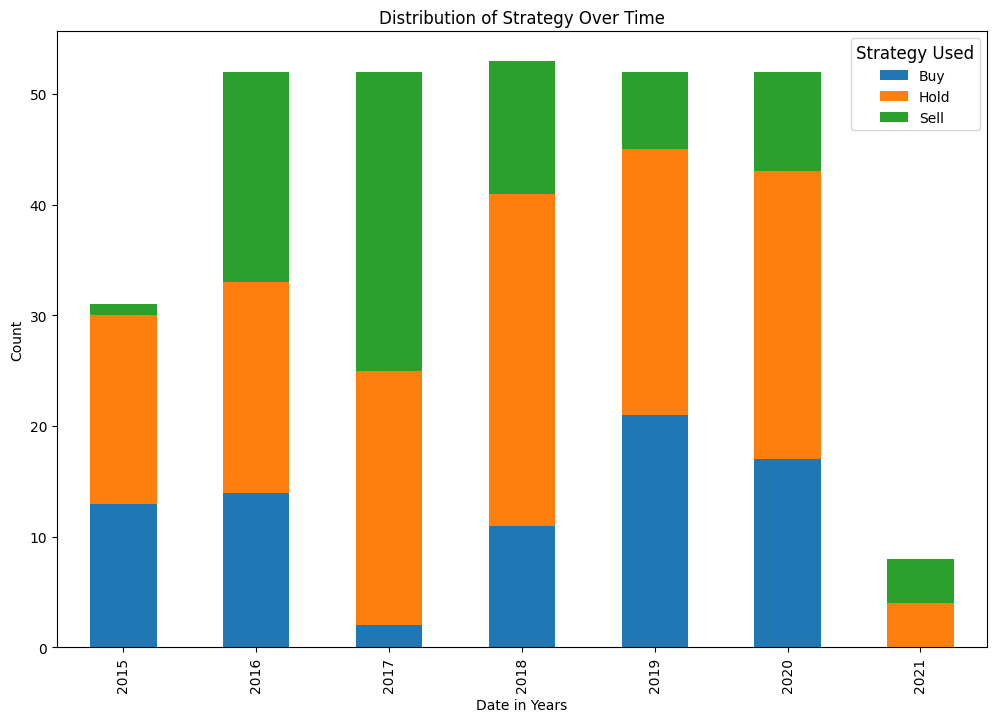

In [234]:
train_data['Year'] = train_data['Date'].dt.year

# Basically we try to group the data by 'Date' and 'Strategy' and then count the number of occurrences
strategy_date_counts = train_data.groupby(['Year', 'Strategy']).size().unstack(fill_value=0)

# Stacked bar plot
strategy_date_counts.plot(kind='bar', stacked=True, figsize=(12, 8))

plt.title('Distribution of Strategy Over Time')
plt.xlabel('Date in Years')
plt.ylabel('Count')
plt.legend(title='Strategy Used', title_fontsize='12', loc='upper right')
plt.show()


## **Autocorrelation plot**

### **Conduct the auto correlation plot to see what to use for the time series data**

- Based on the ACF (Autocorrelation) function, we decide the particular analysis we do on the time series data
- ACF plots are basically bar charts of coefficients of correlation between a time series and its lagged values
- We need to use the ACF plots to identify the order of Autoregressive, Moving Average, and Autoregressive-moving average models,
- ACF plots identify all components of a time series, such as trend, seasonality, cyclicity, and residual.

In [235]:
train_data

,id,Date,Open,Close,Volume,Strategy,Year
0,0,2015-06-01,66.208486,75.609978,298506300,Hold,2015
1,1,2015-06-08,64.116235,74.443331,227974800,Hold,2015
2,2,2015-06-15,47.701942,71.140831,250670900,Buy,2015
3,3,2015-06-22,54.754816,72.881344,223614300,Hold,2015
4,4,2015-06-29,48.031899,66.284718,406814900,Buy,2015
...,...,...,...,...,...,...,...
295,295,2021-01-25,81.284821,83.373498,117281600,Sell,2021
296,296,2021-02-01,71.970249,85.294903,177655800,Sell,2021
297,297,2021-02-08,71.784627,83.266453,146003500,Hold,2021
298,298,2021-02-15,69.372333,81.026827,167762500,Hold,2021


## **Tests for ADF**

**We need to use the Augmented Dickey-Fuller test (ADF test) to check stationarity in the data.**

- ADF uses unit rot to check this
- If the p-value of the test statistic is less than the significance level (i.e. 0.05), then the null hypothesis of a unit root is rejected and the series is concluded to be stationary.
- Otherwise, series is concluded to be non-stationary.

In [236]:
# ADF Test for 'Close' in train_data

from statsmodels.tsa.stattools import adfuller
result = adfuller(train_data['Close'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

if result[0] < result[4]["5%"]:
    print("Null Hypothesis is rejected, so series is stationary")
    
elif result[0] > result[4]["5%"]:
    print("Null Hypothesis is accepted, so series is non-stationary")

ADF Statistic: -1.8080055426222814
p-value: 0.37649446979222156
Null Hypothesis is accepted, so series is non-stationary


In [237]:
# ADF Test for 'Open' in train_data

from statsmodels.tsa.stattools import adfuller
result = adfuller(train_data['Open'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

if result[0] < result[4]["5%"]:
    print("Null Hypothesis is rejected, so series is stationary")
    
elif result[0] > result[4]["5%"]:
    print("Null Hypothesis is accepted, so series is non-stationary")

ADF Statistic: -1.904219816681655
p-value: 0.3300785872505565
Null Hypothesis is accepted, so series is non-stationary


- **Therefore both the 'Open' and the 'Close' are non-stationary**

In [238]:
# To capture volatility of the data, diff calculates the difference between each successive value in the column of train_data
train_data['Open Difference'] = train_data['Open'].diff()
train_data

,id,Date,Open,Close,Volume,Strategy,Year,Open Difference
0,0,2015-06-01,66.208486,75.609978,298506300,Hold,2015,NaN
1,1,2015-06-08,64.116235,74.443331,227974800,Hold,2015,-2.092251
2,2,2015-06-15,47.701942,71.140831,250670900,Buy,2015,-16.414294
3,3,2015-06-22,54.754816,72.881344,223614300,Hold,2015,7.052875
4,4,2015-06-29,48.031899,66.284718,406814900,Buy,2015,-6.722917
...,...,...,...,...,...,...,...,...
295,295,2021-01-25,81.284821,83.373498,117281600,Sell,2021,0.621085
296,296,2021-02-01,71.970249,85.294903,177655800,Sell,2021,-9.314572
297,297,2021-02-08,71.784627,83.266453,146003500,Hold,2021,-0.185622
298,298,2021-02-15,69.372333,81.026827,167762500,Hold,2021,-2.412294


In [239]:
# Calculate daily closing price change, which is the difference in successive values of the 'Close' column
train_data['Price Change'] = train_data['Close'].diff()
train_data

,id,Date,Open,Close,Volume,Strategy,Year,Open Difference,Price Change
0,0,2015-06-01,66.208486,75.609978,298506300,Hold,2015,NaN,NaN
1,1,2015-06-08,64.116235,74.443331,227974800,Hold,2015,-2.092251,-1.166647
2,2,2015-06-15,47.701942,71.140831,250670900,Buy,2015,-16.414294,-3.302500
3,3,2015-06-22,54.754816,72.881344,223614300,Hold,2015,7.052875,1.740512
4,4,2015-06-29,48.031899,66.284718,406814900,Buy,2015,-6.722917,-6.596626
...,...,...,...,...,...,...,...,...,...
295,295,2021-01-25,81.284821,83.373498,117281600,Sell,2021,0.621085,-0.516252
296,296,2021-02-01,71.970249,85.294903,177655800,Sell,2021,-9.314572,1.921405
297,297,2021-02-08,71.784627,83.266453,146003500,Hold,2021,-0.185622,-2.028450
298,298,2021-02-15,69.372333,81.026827,167762500,Hold,2021,-2.412294,-2.239626


## **RSI Calculation**

In [240]:
# Calculate the positive and negative price changes
train_data['Gain'] = train_data['Price Change'].apply(lambda x: x if x > 0 else 0)
train_data['Loss'] = train_data['Price Change'].apply(lambda x: abs(x) if x < 0 else 0)

# Average gain and average loss over a 14-day period
average_gain = train_data['Gain'].rolling(window=14).mean()
average_loss = train_data['Loss'].rolling(window=14).mean()

# Relative Strength
rs = average_gain / average_loss

# Relative Strength Index (RSI) which basically measures speed and change of price movements
rsi = 100 - (100 / (1 + rs))

train_data['RSI'] = rsi

In [241]:
train_data['RSI']

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
         ...    
295    56.466357
296    59.405130
297    53.522191
298    44.235117
299    47.910435
Name: RSI, Length: 300, dtype: float64

In [242]:
# Check for missing values
train_data.isnull().sum()

id                  0
Date                0
Open                0
Close               0
Volume              0
Strategy            0
Year                0
Open Difference     1
Price Change        1
Gain                0
Loss                0
RSI                13
dtype: int64

In [243]:
# Replace missing values with mean
train_data['RSI'].fillna(train_data['RSI'].mean(), inplace=True)

train_data['Price Change'].fillna(0, inplace=True)
train_data['Open Difference'].fillna(0, inplace=True)

In [244]:
# Check if missing values are replaced
train_data.isnull().sum()

id                 0
Date               0
Open               0
Close              0
Volume             0
Strategy           0
Year               0
Open Difference    0
Price Change       0
Gain               0
Loss               0
RSI                0
dtype: int64

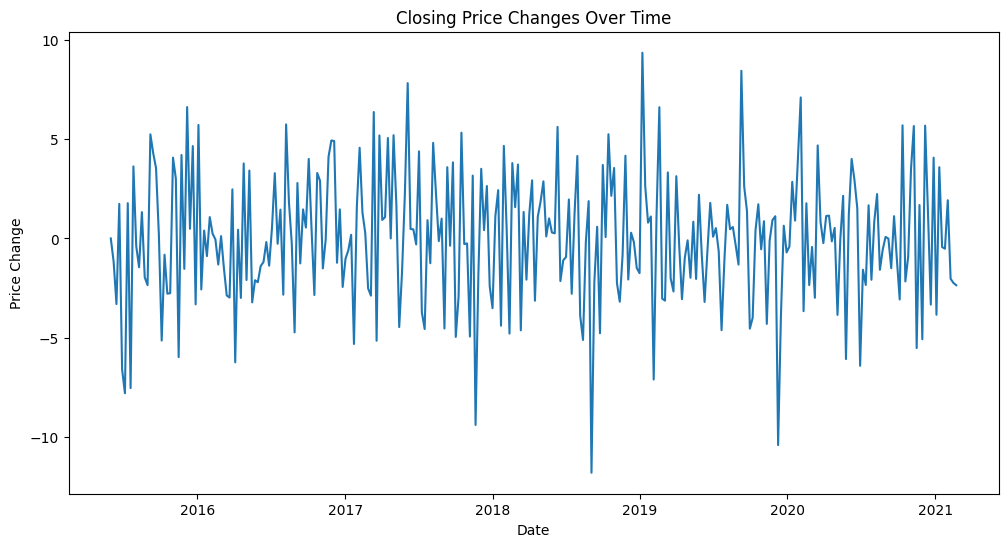

In [245]:
# Closing Price Changes over Time
plt.figure(figsize=(12, 6))
plt.plot(train_data['Date'], train_data['Price Change'])
plt.title('Closing Price Changes Over Time')
plt.xlabel('Date')
plt.ylabel('Price Change')
plt.show()

### **Calculating Exponential Moving Average**

In [246]:
import pandas as pd
import matplotlib.pyplot as plt

# For optimising window sizes 
window_sizes = []
for i in range(1, 200) :
    if i%2 == 0:
      window_sizes.append(i)

results = pd.DataFrame(columns=['Window Size', 'RMSE', 'Accuracy'])

for window_size in window_sizes:
    ema = train_data['Close'].ewm(span=window_size, min_periods=window_size).mean()
    rmse = np.sqrt(np.mean((ema - train_data['Close']) ** 2))
    accuracy = np.sum(ema > train_data['Close']) / len(train_data)
    results = pd.concat([results, pd.DataFrame({'Window Size': window_size, 'RMSE': rmse, 'Accuracy': accuracy}, index=[0])], ignore_index=True)

print(results)


   Window Size      RMSE  Accuracy
0            2  1.098599  0.496667
1            4  2.211060  0.496667
2            6  2.902562  0.480000
3            8  3.384467  0.473333
4           10  3.764144  0.456667
..         ...       ...       ...
94         190  6.036134  0.196667
95         192  5.807316  0.196667
96         194  5.632940  0.196667
97         196  5.419139  0.196667
98         198  5.264102  0.196667

[99 rows x 3 columns]


C:\Users\Vaibhav\AppData\Local\Temp\ipykernel_7224\2542819363.py:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, pd.DataFrame({'Window Size': window_size, 'RMSE': rmse, 'Accuracy': accuracy}, index=[0])], ignore_index=True)


In [247]:
train_data

,id,Date,Open,Close,Volume,Strategy,Year,Open Difference,Price Change,Gain,Loss,RSI
0,0,2015-06-01,66.208486,75.609978,298506300,Hold,2015,0.000000,0.000000,0.000000,0.000000,51.041644
1,1,2015-06-08,64.116235,74.443331,227974800,Hold,2015,-2.092251,-1.166647,0.000000,1.166647,51.041644
2,2,2015-06-15,47.701942,71.140831,250670900,Buy,2015,-16.414294,-3.302500,0.000000,3.302500,51.041644
3,3,2015-06-22,54.754816,72.881344,223614300,Hold,2015,7.052875,1.740512,1.740512,0.000000,51.041644
4,4,2015-06-29,48.031899,66.284718,406814900,Buy,2015,-6.722917,-6.596626,0.000000,6.596626,51.041644
...,...,...,...,...,...,...,...,...,...,...,...,...
295,295,2021-01-25,81.284821,83.373498,117281600,Sell,2021,0.621085,-0.516252,0.000000,0.516252,56.466357
296,296,2021-02-01,71.970249,85.294903,177655800,Sell,2021,-9.314572,1.921405,1.921405,0.000000,59.405130
297,297,2021-02-08,71.784627,83.266453,146003500,Hold,2021,-0.185622,-2.028450,0.000000,2.028450,53.522191
298,298,2021-02-15,69.372333,81.026827,167762500,Hold,2021,-2.412294,-2.239626,0.000000,2.239626,44.235117


- *Window size of approximately 10 seems good for accuracy and to avoid overfitting*
- *Window size of 50 is used commonly in stock trading so we will consider that as well*

In [248]:
import matplotlib.pyplot as plt
import pandas as pd


train_data['EMA_10'] = train_data['Close'].ewm(span=10, min_periods=10).mean()
train_data['EMA_20'] = train_data['Close'].ewm(span=20, min_periods=20).mean()

train_data


,id,Date,Open,Close,Volume,Strategy,Year,Open Difference,Price Change,Gain,Loss,RSI,EMA_10,EMA_20
0,0,2015-06-01,66.208486,75.609978,298506300,Hold,2015,0.000000,0.000000,0.000000,0.000000,51.041644,NaN,NaN
1,1,2015-06-08,64.116235,74.443331,227974800,Hold,2015,-2.092251,-1.166647,0.000000,1.166647,51.041644,NaN,NaN
2,2,2015-06-15,47.701942,71.140831,250670900,Buy,2015,-16.414294,-3.302500,0.000000,3.302500,51.041644,NaN,NaN
3,3,2015-06-22,54.754816,72.881344,223614300,Hold,2015,7.052875,1.740512,1.740512,0.000000,51.041644,NaN,NaN
4,4,2015-06-29,48.031899,66.284718,406814900,Buy,2015,-6.722917,-6.596626,0.000000,6.596626,51.041644,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,295,2021-01-25,81.284821,83.373498,117281600,Sell,2021,0.621085,-0.516252,0.000000,0.516252,56.466357,82.424250,81.502012
296,296,2021-02-01,71.970249,85.294903,177655800,Sell,2021,-9.314572,1.921405,1.921405,0.000000,59.405130,82.946186,81.863240
297,297,2021-02-08,71.784627,83.266453,146003500,Hold,2021,-0.185622,-2.028450,0.000000,2.028450,53.522191,83.004417,81.996879
298,298,2021-02-15,69.372333,81.026827,167762500,Hold,2021,-2.412294,-2.239626,0.000000,2.239626,44.235117,82.644855,81.904493


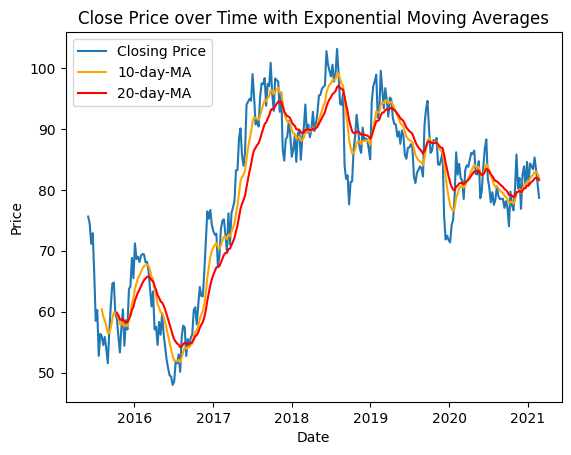

In [249]:
# Plot the closing price and the rolling EMA
plt.plot(train_data['Date'], train_data['Close'], label='Closing Price')
plt.plot(train_data['Date'], train_data['EMA_10'], label='10-day-MA', color='orange')
plt.plot(train_data['Date'], train_data['EMA_20'], label='20-day-MA', color='red')
plt.title('Close Price over Time with Exponential Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


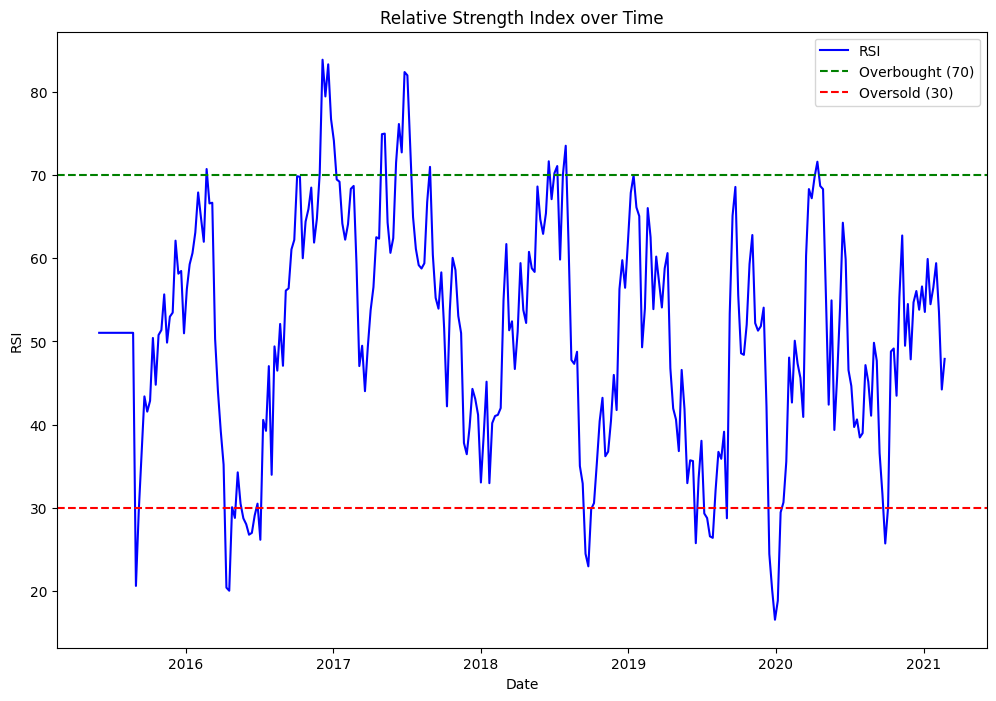

In [250]:
# Plot Relative Strength Index
plt.figure(figsize=(12, 8))
plt.plot(train_data['Date'], train_data['RSI'], label='RSI', color='blue')
plt.axhline(y=70, color='g', linestyle='--', label='Overbought (70)')
plt.axhline(y=30, color='r', linestyle='--', label='Oversold (30)')
plt.title('Relative Strength Index over Time')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()

In [251]:
train_data.drop(columns = ['Gain', 'Loss'], axis = 1 , inplace = True)
train_data

,id,Date,Open,Close,Volume,Strategy,Year,Open Difference,Price Change,RSI,EMA_10,EMA_20
0,0,2015-06-01,66.208486,75.609978,298506300,Hold,2015,0.000000,0.000000,51.041644,NaN,NaN
1,1,2015-06-08,64.116235,74.443331,227974800,Hold,2015,-2.092251,-1.166647,51.041644,NaN,NaN
2,2,2015-06-15,47.701942,71.140831,250670900,Buy,2015,-16.414294,-3.302500,51.041644,NaN,NaN
3,3,2015-06-22,54.754816,72.881344,223614300,Hold,2015,7.052875,1.740512,51.041644,NaN,NaN
4,4,2015-06-29,48.031899,66.284718,406814900,Buy,2015,-6.722917,-6.596626,51.041644,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
295,295,2021-01-25,81.284821,83.373498,117281600,Sell,2021,0.621085,-0.516252,56.466357,82.424250,81.502012
296,296,2021-02-01,71.970249,85.294903,177655800,Sell,2021,-9.314572,1.921405,59.405130,82.946186,81.863240
297,297,2021-02-08,71.784627,83.266453,146003500,Hold,2021,-0.185622,-2.028450,53.522191,83.004417,81.996879
298,298,2021-02-15,69.372333,81.026827,167762500,Hold,2021,-2.412294,-2.239626,44.235117,82.644855,81.904493


In [252]:
train_data['Date'] = pd.to_datetime(train_data['Date'])
train_data

,id,Date,Open,Close,Volume,Strategy,Year,Open Difference,Price Change,RSI,EMA_10,EMA_20
0,0,2015-06-01,66.208486,75.609978,298506300,Hold,2015,0.000000,0.000000,51.041644,NaN,NaN
1,1,2015-06-08,64.116235,74.443331,227974800,Hold,2015,-2.092251,-1.166647,51.041644,NaN,NaN
2,2,2015-06-15,47.701942,71.140831,250670900,Buy,2015,-16.414294,-3.302500,51.041644,NaN,NaN
3,3,2015-06-22,54.754816,72.881344,223614300,Hold,2015,7.052875,1.740512,51.041644,NaN,NaN
4,4,2015-06-29,48.031899,66.284718,406814900,Buy,2015,-6.722917,-6.596626,51.041644,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
295,295,2021-01-25,81.284821,83.373498,117281600,Sell,2021,0.621085,-0.516252,56.466357,82.424250,81.502012
296,296,2021-02-01,71.970249,85.294903,177655800,Sell,2021,-9.314572,1.921405,59.405130,82.946186,81.863240
297,297,2021-02-08,71.784627,83.266453,146003500,Hold,2021,-0.185622,-2.028450,53.522191,83.004417,81.996879
298,298,2021-02-15,69.372333,81.026827,167762500,Hold,2021,-2.412294,-2.239626,44.235117,82.644855,81.904493


In [253]:
train_data['EMA_10'].fillna(0, inplace=True)
train_data['EMA_20'].fillna(0, inplace=True)

In [254]:
train_data

,id,Date,Open,Close,Volume,Strategy,Year,Open Difference,Price Change,RSI,EMA_10,EMA_20
0,0,2015-06-01,66.208486,75.609978,298506300,Hold,2015,0.000000,0.000000,51.041644,0.000000,0.000000
1,1,2015-06-08,64.116235,74.443331,227974800,Hold,2015,-2.092251,-1.166647,51.041644,0.000000,0.000000
2,2,2015-06-15,47.701942,71.140831,250670900,Buy,2015,-16.414294,-3.302500,51.041644,0.000000,0.000000
3,3,2015-06-22,54.754816,72.881344,223614300,Hold,2015,7.052875,1.740512,51.041644,0.000000,0.000000
4,4,2015-06-29,48.031899,66.284718,406814900,Buy,2015,-6.722917,-6.596626,51.041644,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
295,295,2021-01-25,81.284821,83.373498,117281600,Sell,2021,0.621085,-0.516252,56.466357,82.424250,81.502012
296,296,2021-02-01,71.970249,85.294903,177655800,Sell,2021,-9.314572,1.921405,59.405130,82.946186,81.863240
297,297,2021-02-08,71.784627,83.266453,146003500,Hold,2021,-0.185622,-2.028450,53.522191,83.004417,81.996879
298,298,2021-02-15,69.372333,81.026827,167762500,Hold,2021,-2.412294,-2.239626,44.235117,82.644855,81.904493


In [255]:
# Check for missing data in dataframe
train_data.isnull().sum()

id                 0
Date               0
Open               0
Close              0
Volume             0
Strategy           0
Year               0
Open Difference    0
Price Change       0
RSI                0
EMA_10             0
EMA_20             0
dtype: int64

In [256]:
train_train = train_data.iloc[0:(len(train_data)-30)]
validation = train_data.iloc[len(train_train):(len(train_data)-1)]

In [257]:
import statsmodels.api as sm
endog = train_train['Close']
exog = train_train[['Open', 'Volume']]

# Fit the SARIMAX model
model=sm.tsa.statespace.SARIMAX(train_train['Close'],order=(2, 1, 2),seasonal_order=(2,1,2,12))
#model = sm.tsa.SARIMAX(endog=endog, order=(2, 1, 2), seasonal_order=(2, 1, 2, 12))  
results = model.fit()

# Get model summary
print(results.summary())


                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                  270
Model:             SARIMAX(2, 1, 2)x(2, 1, 2, 12)   Log Likelihood                -686.730
Date:                            Thu, 02 Nov 2023   AIC                           1391.460
Time:                                    18:56:25   BIC                           1423.402
Sample:                                         0   HQIC                          1404.306
                                            - 270                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2307      0.740      0.312      0.755      -1.220       1.681
ar.L2          0.5727      0.552   

In [258]:
validation_endog = validation['Close']
validation_exog = validation[["Open Difference", "RSI", 'Price Change']]

In [259]:
forecast = results.get_forecast(steps=len(validation), exog=validation_exog)
forecast_values = forecast.predicted_mean
print("Forecasted values for the validation set:")
print(forecast_values)

Forecasted values for the validation set:
270    77.333331
271    77.604024
272    75.905567
273    76.541931
274    77.112445
275    78.473391
276    77.394464
277    77.115081
278    76.782741
279    76.569110
280    78.406943
281    77.854144
282    77.645915
283    77.804989
284    79.401103
285    79.752409
286    79.456275
287    79.778316
288    79.066176
289    80.186686
290    80.558799
291    80.130018
292    80.119326
293    79.521996
294    79.015699
295    79.248137
296    78.374080
297    78.872509
298    79.080373
Name: predicted_mean, dtype: float64


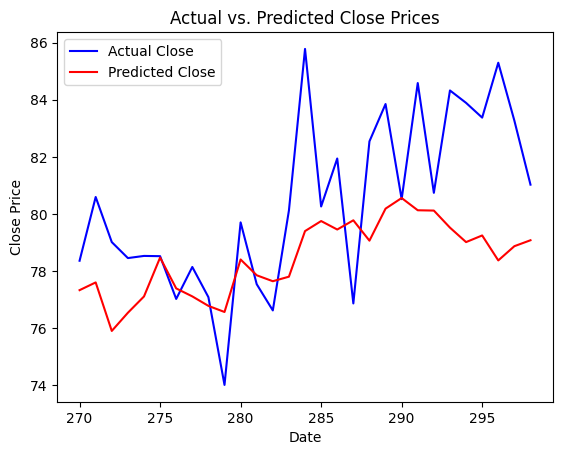

In [260]:
import matplotlib.pyplot as plt
date_index = validation.index

plt.plot(date_index, validation["Close"], label="Actual Close", color="blue")
plt.plot(date_index, forecast_values, label="Predicted Close", color="red")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.title("Actual vs. Predicted Close Prices")
plt.legend()
plt.show()


In [261]:
y_pred = forecast_values
y_true = validation['Close']
smape = np.mean(np.abs(y_pred - y_true) / (np.abs(y_pred) + np.abs(y_true)))
print(smape)

0.015302231047514785


In [262]:
submission = pd.DataFrame()
submission['id'] = test_data['id']
submission["Date"] = test_data["Date"]

In [263]:
close_values=[]
for i in train_train["Close"]:
    close_values.append(i)
print(close_values)
close_values=close_values[:100]

[75.60997811636648, 74.44333111899341, 71.14083142721184, 72.88134353255981, 66.28471789037816, 58.49401653541783, 60.26934702596188, 52.73847741829011, 56.363684390622765, 55.97524222754255, 54.52276373875893, 55.84627341768842, 53.89054221762038, 51.54011643549476, 56.77757857758555, 61.0653443750646, 64.60072541626913, 64.78811804134, 59.64842725819604, 58.8299875342251, 56.049315606788106, 53.29388430295501, 57.35854129262062, 60.376909647102224, 54.40508828791114, 58.6034953768018, 57.07208195030615, 63.68254787488225, 64.16760513304598, 68.81370169777519, 65.4965364777801, 71.20659482006528, 68.63874962624658, 69.0335233975157, 68.142327537825, 69.21569645105151, 69.4541584960197, 69.40275807010526, 68.08752354929518, 68.20344751568997, 66.70738062917873, 63.83847740557196, 60.86219516366219, 63.33181503162901, 57.096512203901554, 57.531981119425225, 54.537248452544574, 58.31162736330031, 56.21990648753747, 59.635900440334055, 56.41854723734442, 54.31585011860216, 52.113800852482

In [264]:
test_data['Close'] = close_values

In [265]:
train_train

,id,Date,Open,Close,Volume,Strategy,Year,Open Difference,Price Change,RSI,EMA_10,EMA_20
0,0,2015-06-01,66.208486,75.609978,298506300,Hold,2015,0.000000,0.000000,51.041644,0.000000,0.000000
1,1,2015-06-08,64.116235,74.443331,227974800,Hold,2015,-2.092251,-1.166647,51.041644,0.000000,0.000000
2,2,2015-06-15,47.701942,71.140831,250670900,Buy,2015,-16.414294,-3.302500,51.041644,0.000000,0.000000
3,3,2015-06-22,54.754816,72.881344,223614300,Hold,2015,7.052875,1.740512,51.041644,0.000000,0.000000
4,4,2015-06-29,48.031899,66.284718,406814900,Buy,2015,-6.722917,-6.596626,51.041644,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
265,265,2020-06-29,75.271332,81.855928,291263900,Hold,2020,1.429127,-6.409230,46.564661,83.797785,83.296869
266,266,2020-07-06,76.019463,80.279726,270574000,Hold,2020,0.748131,-1.576201,44.655653,83.158138,83.009522
267,267,2020-07-13,76.734810,77.939021,131768400,Buy,2020,0.715346,-2.340705,39.728976,82.209207,82.526617
268,268,2020-07-20,76.742992,79.606191,105776600,Hold,2020,0.008182,1.667170,40.640846,81.735932,82.248481


### **Convert string data type in 'Strategy' into numerical data by encoding**
- Sell = 0
- Hold = 1
- Buy = 2

In [266]:
train_train['Strategy'] = train_train['Strategy'].replace({'Sell': 0, 'Hold': 1, 'Buy': 2})

C:\Users\Vaibhav\AppData\Local\Temp\ipykernel_7224\1601329350.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_train['Strategy'] = train_train['Strategy'].replace({'Sell': 0, 'Hold': 1, 'Buy': 2})


In [267]:
train_train

,id,Date,Open,Close,Volume,Strategy,Year,Open Difference,Price Change,RSI,EMA_10,EMA_20
0,0,2015-06-01,66.208486,75.609978,298506300,1,2015,0.000000,0.000000,51.041644,0.000000,0.000000
1,1,2015-06-08,64.116235,74.443331,227974800,1,2015,-2.092251,-1.166647,51.041644,0.000000,0.000000
2,2,2015-06-15,47.701942,71.140831,250670900,2,2015,-16.414294,-3.302500,51.041644,0.000000,0.000000
3,3,2015-06-22,54.754816,72.881344,223614300,1,2015,7.052875,1.740512,51.041644,0.000000,0.000000
4,4,2015-06-29,48.031899,66.284718,406814900,2,2015,-6.722917,-6.596626,51.041644,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
265,265,2020-06-29,75.271332,81.855928,291263900,1,2020,1.429127,-6.409230,46.564661,83.797785,83.296869
266,266,2020-07-06,76.019463,80.279726,270574000,1,2020,0.748131,-1.576201,44.655653,83.158138,83.009522
267,267,2020-07-13,76.734810,77.939021,131768400,2,2020,0.715346,-2.340705,39.728976,82.209207,82.526617
268,268,2020-07-20,76.742992,79.606191,105776600,1,2020,0.008182,1.667170,40.640846,81.735932,82.248481


## **Test which features have the most correlation with the 'Strategy'**

In [268]:
train_train['Open'].corr(train_train['Strategy'])

-0.30713788666430464

In [269]:
train_train['Close'].corr(train_train['Strategy'])

-0.35838524897097945

In [270]:
train_train['Price Change'].corr(train_train['Strategy'])

-0.3658113625324521

In [271]:
train_train['RSI'].corr(train_train['Strategy'])

-0.7481956915828366

In [272]:
train_train['EMA_20'].corr(train_train['Strategy'])

-0.17928520253923652

In [273]:
train_train['Volume'].corr(train_train['Strategy'])

0.15492765681559448

In [274]:
# Convert back into categorical data
train_train['Strategy'] = train_train['Strategy'].replace({0 : 'Sell', 1 : 'Hold', 2 : 'Buy'})
train_train

C:\Users\Vaibhav\AppData\Local\Temp\ipykernel_7224\563038973.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_train['Strategy'] = train_train['Strategy'].replace({0 : 'Sell', 1 : 'Hold', 2 : 'Buy'})


,id,Date,Open,Close,Volume,Strategy,Year,Open Difference,Price Change,RSI,EMA_10,EMA_20
0,0,2015-06-01,66.208486,75.609978,298506300,Hold,2015,0.000000,0.000000,51.041644,0.000000,0.000000
1,1,2015-06-08,64.116235,74.443331,227974800,Hold,2015,-2.092251,-1.166647,51.041644,0.000000,0.000000
2,2,2015-06-15,47.701942,71.140831,250670900,Buy,2015,-16.414294,-3.302500,51.041644,0.000000,0.000000
3,3,2015-06-22,54.754816,72.881344,223614300,Hold,2015,7.052875,1.740512,51.041644,0.000000,0.000000
4,4,2015-06-29,48.031899,66.284718,406814900,Buy,2015,-6.722917,-6.596626,51.041644,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
265,265,2020-06-29,75.271332,81.855928,291263900,Hold,2020,1.429127,-6.409230,46.564661,83.797785,83.296869
266,266,2020-07-06,76.019463,80.279726,270574000,Hold,2020,0.748131,-1.576201,44.655653,83.158138,83.009522
267,267,2020-07-13,76.734810,77.939021,131768400,Buy,2020,0.715346,-2.340705,39.728976,82.209207,82.526617
268,268,2020-07-20,76.742992,79.606191,105776600,Hold,2020,0.008182,1.667170,40.640846,81.735932,82.248481


## **Test Dataframe Manipulation**

In [275]:
test_data

,id,Date,Open,Volume,Close
0,0,2021-03-01,72.708331,205897600,75.609978
1,1,2021-03-08,73.310886,214095600,74.443331
2,2,2021-03-15,70.610119,151601700,71.140831
3,3,2021-03-22,70.256017,193982500,72.881344
4,4,2021-03-29,68.258324,220238400,66.284718
...,...,...,...,...,...
95,95,2022-12-26,57.048622,224994700,76.160757
96,96,2023-01-02,60.569661,176020500,77.090685
97,97,2023-01-09,61.446777,181478600,78.163791
98,98,2023-01-16,55.447711,162471700,83.218385


In [276]:
test_data['Open Difference'] = test_data['Open'].diff()
test_data

,id,Date,Open,Volume,Close,Open Difference
0,0,2021-03-01,72.708331,205897600,75.609978,NaN
1,1,2021-03-08,73.310886,214095600,74.443331,0.602555
2,2,2021-03-15,70.610119,151601700,71.140831,-2.700767
3,3,2021-03-22,70.256017,193982500,72.881344,-0.354102
4,4,2021-03-29,68.258324,220238400,66.284718,-1.997693
...,...,...,...,...,...,...
95,95,2022-12-26,57.048622,224994700,76.160757,1.864530
96,96,2023-01-02,60.569661,176020500,77.090685,3.521039
97,97,2023-01-09,61.446777,181478600,78.163791,0.877116
98,98,2023-01-16,55.447711,162471700,83.218385,-5.999066


In [277]:
# Replace missing values in test dataframe
test_data['Open Difference'].fillna(0, inplace=True)
test_data

,id,Date,Open,Volume,Close,Open Difference
0,0,2021-03-01,72.708331,205897600,75.609978,0.000000
1,1,2021-03-08,73.310886,214095600,74.443331,0.602555
2,2,2021-03-15,70.610119,151601700,71.140831,-2.700767
3,3,2021-03-22,70.256017,193982500,72.881344,-0.354102
4,4,2021-03-29,68.258324,220238400,66.284718,-1.997693
...,...,...,...,...,...,...
95,95,2022-12-26,57.048622,224994700,76.160757,1.864530
96,96,2023-01-02,60.569661,176020500,77.090685,3.521039
97,97,2023-01-09,61.446777,181478600,78.163791,0.877116
98,98,2023-01-16,55.447711,162471700,83.218385,-5.999066


In [278]:
test_data['Price Change'] = test_data['Close'].diff()
test_data

,id,Date,Open,Volume,Close,Open Difference,Price Change
0,0,2021-03-01,72.708331,205897600,75.609978,0.000000,NaN
1,1,2021-03-08,73.310886,214095600,74.443331,0.602555,-1.166647
2,2,2021-03-15,70.610119,151601700,71.140831,-2.700767,-3.302500
3,3,2021-03-22,70.256017,193982500,72.881344,-0.354102,1.740512
4,4,2021-03-29,68.258324,220238400,66.284718,-1.997693,-6.596626
...,...,...,...,...,...,...,...
95,95,2022-12-26,57.048622,224994700,76.160757,1.864530,5.181718
96,96,2023-01-02,60.569661,176020500,77.090685,3.521039,0.929928
97,97,2023-01-09,61.446777,181478600,78.163791,0.877116,1.073106
98,98,2023-01-16,55.447711,162471700,83.218385,-5.999066,5.054594


In [279]:
# Replace missing values in test dataframe
test_data['Price Change'].fillna(0, inplace=True)
test_data

,id,Date,Open,Volume,Close,Open Difference,Price Change
0,0,2021-03-01,72.708331,205897600,75.609978,0.000000,0.000000
1,1,2021-03-08,73.310886,214095600,74.443331,0.602555,-1.166647
2,2,2021-03-15,70.610119,151601700,71.140831,-2.700767,-3.302500
3,3,2021-03-22,70.256017,193982500,72.881344,-0.354102,1.740512
4,4,2021-03-29,68.258324,220238400,66.284718,-1.997693,-6.596626
...,...,...,...,...,...,...,...
95,95,2022-12-26,57.048622,224994700,76.160757,1.864530,5.181718
96,96,2023-01-02,60.569661,176020500,77.090685,3.521039,0.929928
97,97,2023-01-09,61.446777,181478600,78.163791,0.877116,1.073106
98,98,2023-01-16,55.447711,162471700,83.218385,-5.999066,5.054594


In [280]:
# Calculate the positive and negative price changes
test_data['Gain'] = test_data['Price Change'].apply(lambda x: x if x > 0 else 0)
test_data['Loss'] = test_data['Price Change'].apply(lambda x: abs(x) if x < 0 else 0)

# Average gain and Average loss over a 14-day period
average_gain = test_data['Gain'].rolling(window=14).mean()
average_loss = test_data['Loss'].rolling(window=14).mean()

# Calculate the Relative Strength (RS)
rs = average_gain / average_loss

# Calculate the RSI
rsi = 100 - (100 / (1 + rs))

test_data['RSI'] = rsi
test_data

,id,Date,Open,Volume,Close,Open Difference,Price Change,Gain,Loss,RSI
0,0,2021-03-01,72.708331,205897600,75.609978,0.000000,0.000000,0.000000,0.000000,NaN
1,1,2021-03-08,73.310886,214095600,74.443331,0.602555,-1.166647,0.000000,1.166647,NaN
2,2,2021-03-15,70.610119,151601700,71.140831,-2.700767,-3.302500,0.000000,3.302500,NaN
3,3,2021-03-22,70.256017,193982500,72.881344,-0.354102,1.740512,1.740512,0.000000,NaN
4,4,2021-03-29,68.258324,220238400,66.284718,-1.997693,-6.596626,0.000000,6.596626,NaN
...,...,...,...,...,...,...,...,...,...,...
95,95,2022-12-26,57.048622,224994700,76.160757,1.864530,5.181718,5.181718,0.000000,49.325511
96,96,2023-01-02,60.569661,176020500,77.090685,3.521039,0.929928,0.929928,0.000000,53.757966
97,97,2023-01-09,61.446777,181478600,78.163791,0.877116,1.073106,1.073106,0.000000,56.524676
98,98,2023-01-16,55.447711,162471700,83.218385,-5.999066,5.054594,5.054594,0.000000,62.519068


In [281]:
test_data.drop(columns = ['Gain', 'Loss'], axis = 1, inplace = True)
test_data

,id,Date,Open,Volume,Close,Open Difference,Price Change,RSI
0,0,2021-03-01,72.708331,205897600,75.609978,0.000000,0.000000,NaN
1,1,2021-03-08,73.310886,214095600,74.443331,0.602555,-1.166647,NaN
2,2,2021-03-15,70.610119,151601700,71.140831,-2.700767,-3.302500,NaN
3,3,2021-03-22,70.256017,193982500,72.881344,-0.354102,1.740512,NaN
4,4,2021-03-29,68.258324,220238400,66.284718,-1.997693,-6.596626,NaN
...,...,...,...,...,...,...,...,...
95,95,2022-12-26,57.048622,224994700,76.160757,1.864530,5.181718,49.325511
96,96,2023-01-02,60.569661,176020500,77.090685,3.521039,0.929928,53.757966
97,97,2023-01-09,61.446777,181478600,78.163791,0.877116,1.073106,56.524676
98,98,2023-01-16,55.447711,162471700,83.218385,-5.999066,5.054594,62.519068


In [282]:
test_data['RSI'].fillna(test_data['RSI'].mean(), inplace=True)

In [283]:
test_data['EMA_20'] = test_data['Close'].ewm(span=20, min_periods=20).mean()

In [284]:
test_data['EMA_20'].fillna(0, inplace=True)

In [285]:
test_data

,id,Date,Open,Volume,Close,Open Difference,Price Change,RSI,EMA_20
0,0,2021-03-01,72.708331,205897600,75.609978,0.000000,0.000000,52.367296,0.000000
1,1,2021-03-08,73.310886,214095600,74.443331,0.602555,-1.166647,52.367296,0.000000
2,2,2021-03-15,70.610119,151601700,71.140831,-2.700767,-3.302500,52.367296,0.000000
3,3,2021-03-22,70.256017,193982500,72.881344,-0.354102,1.740512,52.367296,0.000000
4,4,2021-03-29,68.258324,220238400,66.284718,-1.997693,-6.596626,52.367296,0.000000
...,...,...,...,...,...,...,...,...,...
95,95,2022-12-26,57.048622,224994700,76.160757,1.864530,5.181718,49.325511,70.889466
96,96,2023-01-02,60.569661,176020500,77.090685,3.521039,0.929928,53.757966,71.480095
97,97,2023-01-09,61.446777,181478600,78.163791,0.877116,1.073106,56.524676,72.116672
98,98,2023-01-16,55.447711,162471700,83.218385,-5.999066,5.054594,62.519068,73.174031


In [286]:
print(test_data.isnull().sum())

id                 0
Date               0
Open               0
Volume             0
Close              0
Open Difference    0
Price Change       0
RSI                0
EMA_20             0
dtype: int64


## **XGBoost Code and Submission**

In [287]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# Dataframe is called 'train_train'

# X is features and y is trarget variable
X = train_train[['Open', 'Close', 'RSI', 'EMA_20', 'Price Change', 'Volume']]
y = train_train['Strategy']

# Encoding 
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# model = xgb.XGBClassifier(learning_rate=0.1, max_depth=5, n_estimators=100)
model = xgb.XGBClassifier(learning_rate=0.1, max_depth=2, n_estimators=200)
model.fit(X_train, y_train)

# Make predictions on the test set which is a dataframe called 'test_data'

test_features = test_data[['Open', 'Close', 'RSI', 'EMA_20', 'Price Change', 'Volume']]
predictions = model.predict(test_features)

# Decoding
predicted_labels = label_encoder.inverse_transform(predictions)

output = pd.DataFrame({'Strategy': predicted_labels})
test_accuracy = accuracy_score(y_test, model.predict(X_test))
print(f'Test Accuracy: {test_accuracy:.2f}')

Test Accuracy: 0.85


In [288]:
sample_submission = pd.read_csv('sample_submission.csv')

In [289]:
sample_submission["Close"] = close_values
sample_submission["Strategy"] = predicted_labels

### In the cell above, we have just provided an example of how to create your submission DataFrame. Please make sure to use **your own forecasts and predictions**, in place of `sample_submission["Close"]` and `sample_submission["Strategy"]`

In [290]:
sample_submission.head()

,id,Date,Close,Strategy
0,0,2021-03-01,75.609978,Hold
1,1,2021-03-08,74.443331,Hold
2,2,2021-03-15,71.140831,Hold
3,3,2021-03-22,72.881344,Hold
4,4,2021-03-29,66.284718,Hold


In [291]:
sample_submission.to_csv('submission.csv', index=False)